In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

In [2]:
# Importing dataset through Pandas
df = pd.read_csv("../datasets/Clients.csv")
df.head()

,age,job,marital,education,default,balance,housing,personal,term
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,35,management,married,tertiary,no,231,yes,no,no
4,28,management,single,tertiary,no,447,yes,yes,no


In [3]:
# Shape of the dataset
print(df.shape)

(43193, 9)


In [4]:
# info of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43193 entries, 0 to 43192
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43193 non-null  int64 
 1   job        43193 non-null  object
 2   marital    43193 non-null  object
 3   education  43193 non-null  object
 4   default    43193 non-null  object
 5   balance    43193 non-null  int64 
 6   housing    43193 non-null  object
 7   personal   43193 non-null  object
 8   term       43193 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.0+ MB
None


In [5]:
# Description of dataset
print(df.describe())

                age        balance
count  43193.000000   43193.000000
mean      40.764082    1354.027342
std       10.512640    3042.103625
min       18.000000   -8019.000000
25%       33.000000      71.000000
50%       39.000000     442.000000
75%       48.000000    1412.000000
max       95.000000  102127.000000


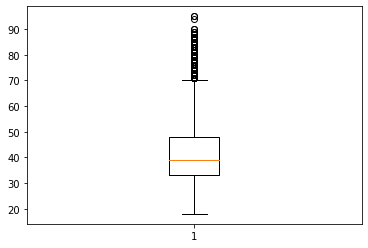

In [6]:
#Determining outliers in the dataset
plt.boxplot(df["age"])
plt.show()

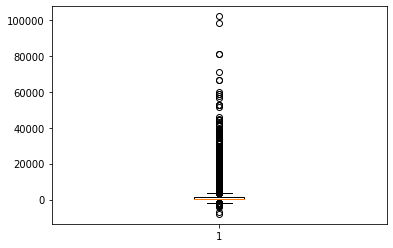

In [7]:
plt.boxplot(df["balance"])
plt.show()

In [8]:
# Quantiles of balance and age
LQ_bal =df['balance'].quantile(0.05)
UQ_bal=df['balance'].quantile(0.95)
LQ_age =df['age'].quantile(0.05)
UQ_age=df['age'].quantile(0.95)
print('Lower Quartile of age:',LQ_age)
print('Upper Quartile of age:',UQ_age)
print('Lower Quartile of balance:',LQ_bal)
print('Upper Quartile of balance:',UQ_bal)
print(df['age'].skew())
print(df['balance'].skew())

Lower Quartile of age: 27.0
Upper Quartile of age: 59.0
Lower Quartile of balance: -175.4000000000001
Upper Quartile of balance: 5735.4000000000015
0.6978356364509636
8.400120937754398


In [9]:
# Remove the outliters of age and balance

index_age = df[(df['age'] >= 59.0)|(df['age'] <= 27.0)].index
df.drop(index_age, inplace=True)
index_bal = df[(df['balance'] >= 5735.40)|(df['balance'] <= -175.4)].index
df.drop(index_bal, inplace=True)
print(df['age'].describe())
print(df['age'].shape)
print(df['balance'].shape)
print(df['age'].skew())
print(df['balance'].skew())

count    34129.000000
mean        40.444373
std          8.408279
min         28.000000
25%         33.000000
50%         39.000000
75%         47.000000
max         58.000000
Name: age, dtype: float64
(34129,)
(34129,)
0.4388960345171001
1.853865203104021


In [10]:
# Converting Categorical features into Numerical features

for column in df.columns:
    if df[column].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[column].values)) 
        df[column] = lbl.transform(list(df[column].values))

In [11]:
# Defining if alcohol was high or low
def converter(column):
    if column < 18:
        return 0 # Below 18
    elif column >= 18 and column < 36:
        return 1 # middle aged
    else :
        return 2 #old-aged
df['age'] = df['age'].apply(converter)
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34129 entries, 0 to 43192
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        34129 non-null  int64
 1   job        34129 non-null  int64
 2   marital    34129 non-null  int64
 3   education  34129 non-null  int64
 4   default    34129 non-null  int64
 5   balance    34129 non-null  int64
 6   housing    34129 non-null  int64
 7   personal   34129 non-null  int64
 8   term       34129 non-null  int64
dtypes: int64(9)
memory usage: 2.6 MB
None


In [12]:
df.head()

,age,job,marital,education,default,balance,housing,personal,term
0,2,4,1,2,0,2143,1,0,0
1,2,9,2,1,0,29,1,0,0
2,1,2,1,1,0,2,1,1,0
3,1,4,1,2,0,231,1,0,0
4,1,4,2,2,0,447,1,1,0


In [13]:
# Plotting Correlation Heatmap
corrs = df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='client-corrheatmap.html')

'client-corrheatmap.html'

In [14]:
# Description of dataset
df.describe()

,age,job,marital,education,default,balance,housing,personal,term
count,34129.000000,34129.000000,34129.000000,34129.000000,34129.000000,34129.000000,34129.000000,34129.000000,34129.000000
mean,1.640364,4.243312,1.142372,1.158135,0.012951,912.876615,0.580093,0.161944,0.101907
std,0.479901,3.275615,0.600028,0.665028,0.113064,1188.531314,0.493551,0.368405,0.302531
min,1.000000,0.000000,0.000000,0.000000,0.000000,-175.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,97.000000,0.000000,0.000000,0.000000
50%,2.000000,4.000000,1.000000,1.000000,0.000000,438.000000,1.000000,0.000000,0.000000
75%,2.000000,7.000000,2.000000,2.000000,0.000000,1243.000000,1.000000,0.000000,0.000000
max,2.000000,10.000000,2.000000,2.000000,1.000000,5735.000000,1.000000,1.000000,1.000000


In [15]:
age = list(df['age'])
job = list(df['job'])
marital = list(df['marital'])
education = list(df['education'])
default = list(df['default'])
balance = list(df['balance'])
housing = list(df['housing'])
personal = list(df['personal'])
term = list(df['term'])

In [16]:
# Implementing PCA to visualize dataset

X = df.drop(['personal'], axis = 1) # Features
Y = df['personal'] # Labels

feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the 2_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the 2_components: ",sum(pca.explained_variance_ratio_))

data = [go.Scatter(x=x_pca[:,0], y=x_pca[:,1], mode='markers',
                    marker = dict(color=Y,  opacity=0.5),
                                text=[f'age: {a}; job: {b}; marital:{c}, education:{d}, default:{e}, balance:{f},housing:{g},personal:{h}, term:{i}' 
                                      for a,b,c,d,e,f,g,h,i in list(zip(age,job,marital,education,default,balance,housing,
                                                                        personal,
                                                                       term))],
                                hoverinfo='text')]

layout = go.Layout(title = 'PCA Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Principal Component'),
                    yaxis = dict(title='Second Principal Component'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='clients-pca.html')

Variance explained by each of the 2_components:  [0.1873631  0.15424172]
Total variance explained by the 2_components:  0.3416048199747922


'clients-pca.html'

In [17]:
# Subset 1
personal_subset = df[['age', 'education', 'marital']]

# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_personal_subset = feature_scaler.fit_transform(personal_subset)

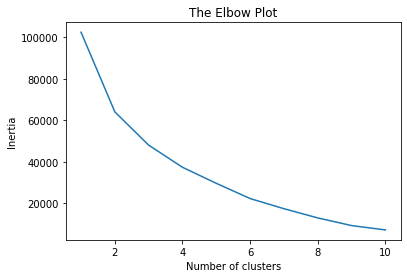

In [18]:
# Finding the number of clusters (K) - Elbow Plot Method for subset 1
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X_personal_subset)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
# Running KMeans to generate labels for subset 1
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_personal_subset)

# Implementing t-SNE to visualize dataset for subset 1
tsne = TSNE(n_components = 2, perplexity =50,n_iter=5000)
x_tsne = tsne.fit_transform(X_personal_subset)


data = [go.Scatter(x=x_tsne[:,0],
                   y=x_tsne[:,1], 
                   mode='markers',
                   marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                   text=[f'age: {b}, education: {c}, marital: {d}' 
                         for b,c,d in list(zip(age, education, marital))],
                                hoverinfo='text')]
layout = go.Layout(title = 't-SNE Dimensionality Reduction for Clients Subset 1', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='client-t-SNE-subset1.html')

'client-t-SNE-subset1.html'

In [20]:
# Subset 2
credit_subset = df[['age', 'default', 'term']]

# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_credit_subset = feature_scaler.fit_transform(credit_subset)

/home/mayur/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.

/home/mayur/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.



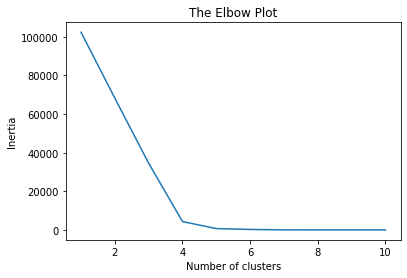

In [21]:
# Finding the number of clusters (K) - Elbow Plot Method for subset 2
inertia = []
for i in range(1,9):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X_credit_subset)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [22]:
# Running KMeans to generate labels for subset 2
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_credit_subset)

# Implementing t-SNE to visualize dataset
tsne = TSNE(n_components = 2, perplexity =70,n_iter=3000)
x_tsne = tsne.fit_transform(X_credit_subset)


data = [go.Scatter(x=x_tsne[:,0],
                   y=x_tsne[:,1], 
                   mode='markers',
                   marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                   text=[f'age: {b}, default: {c}, term: {d}' 
                         for b,c,d in list(zip(age, default, term))],
                                hoverinfo='text')]
layout = go.Layout(title = 't-SNE Dimensionality Reduction for Clients Subset 2', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='client-t-SNE-subset2.html')

'client-t-SNE-subset2.html'

In [23]:
# Subset 3
loan_subset = df[['job', 'housing', 'personal']]

# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X = feature_scaler.fit_transform(loan_subset)

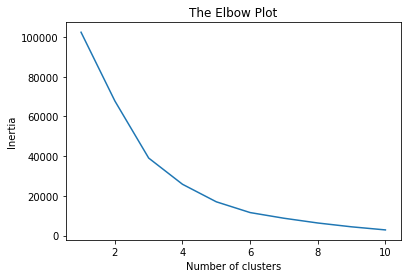

In [24]:
# Finding the number of clusters (K) - Elbow Plot Method for subset 3
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [25]:
# Running KMeans to generate labels for subset 3
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

# Implementing t-SNE to visualize dataset for subset 3
tsne = TSNE(n_components = 2, perplexity =100,n_iter=3000)
x_tsne = tsne.fit_transform(X)


data = [go.Scatter(x=x_tsne[:,0],
                   y=x_tsne[:,1], 
                   mode='markers',
                   marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                   text=[f'job: {b}, housing: {c}, personal: {d}' 
                         for b,c,d in list(zip(job, housing, personal))],
                                hoverinfo='text')]
layout = go.Layout(title = 't-SNE Dimensionality Reduction for Clients Subset 3', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='client-t-SNE-subset3.html')

'client-t-SNE-subset3.html'